# Geopandas Tutorial
[FOSS4G UK 2019](https://uk.osgeo.org/foss4guk2019/) - [Workshop 'Geoprocessing with Jupyter Notebooks'](https://github.com/samfranklin/foss4guk19-jupyter)  
[Sam Franklin](https://github.com/samfranklin) - [SCISYS](https://www.scisys.co.uk/)

## Introduction

The principle python package that we'll use in the workshop is [GeoPandas](http://geopandas.org/#). Geopandas extends the popular pandas package, to allow a variety of spatial operations to be performed on data.

Think of `Attribute Table` in a desktop GIS, this is roughly equivalent to a pandas `DataFrame`. Pandas doesn't understand geometry and anything to do with geography, so `GeoDataFrame` that is made available via the `geopandas` package, adds that all important geometry 'column' together with a bunch of spatial operations like plotting, and filtering data, merging data.

In addition to `geopandas` will be use other python packages such as `cartopy` and `matplotlib` to enchance the outputs.

This tutorial will run through some basic geopandas operations, and cherry pick a few use cases to give you a favour of what can be done. As a reminder this is a basic tutorial which hopefully will give you some ideas to start hacking on your own notebook with your own data.

This tutorial has the following parts:

#### Part 1. Basic Geopandas operations,
* Create a GeoDataFrame from the natural earth countries dataset.
* Explore the GeoDataFrame and perform simple queries to filter data.

####  Part 2. Making simple maps using Plot
* Make some simple maps and plots, e.g. creating a chloropeth using the geopandas "plot" method

#### Part 3. Using Cartopy
* Generate a plot with cartopy to see how projection can be handled.

#### Part 4. More advanced plotting with Matplotlib
* Get our hands dirty with matplotlib with combining common pandas plots with maps

#### Part 5. Making a simple API call and loading to GeoPandas
* Make a simple API call to the USGS Earthquakes end-point using the `requests` python package.
* Load data to a geopandas dataframe using the

#### Part 6. Spatial joining data
* Read two flat files shape file of polygons of London Boroughs and a CSV of point data of crime incidents which contains coordinates.
* Create a geodataframe from the "non-geospatial" CSV format.
* Perform an aggregation function on the crime data to count the number of crimes per crime category
* Spatially join that data to the administrative polygon units
* Plot the results

In [1]:
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
import requests
import geojson
import pandas as pd
import os
from shapely.geometry import Point
import fiona
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

# Part 1. An Introduction to the Geopandas and the GeoDataFrame 

Geopandas ships with a  has a number of demo datasets, so let's use the [Natural Earth](https://www.naturalearthdata.com/) "countries" dataset  

First let's checkout the path to this file

In [2]:
gpd.datasets.get_path('naturalearth_lowres')

'C:\\Users\\franklin_sr\\AppData\\Local\\Continuum\\miniconda3\\envs\\jgpenv-lite\\lib\\site-packages\\geopandas\\datasets\\naturalearth_lowres\\naturalearth_lowres.shp'

to create a `GeoDataFrame` directly from reading a file, use `read_file` method

In [3]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

It is often useful to check the type of a python object

In [4]:
type(countries)

geopandas.geodataframe.GeoDataFrame

Also, it's useful to know what `attributes` a python object has. Obviously, the documentation for the package *should* indicate that, but in case it doesn't it's often useful to know what's available

In [5]:
dir(countries);

Let's look at the GeoDataFrame "table"

In [6]:
countries.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


To filter the output of a dataframe by a column value, use
This is comproable to a SQL
```sql
SELECT * FROM 'countries' WHERE continent = 'Africa';
```

In [7]:
countries[countries.continent == 'Africa']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,POLYGON ((29.33999759290035 -4.499983412294092...
12,7531386,Africa,Somalia,SOM,4719.0,"POLYGON ((41.58513 -1.68325, 40.993 -0.85829, ..."
13,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.7669 -3.67712,..."
14,37345935,Africa,Sudan,SDN,176300.0,"POLYGON ((24.56736901215208 8.229187933785468,..."
15,12075985,Africa,Chad,TCD,30590.0,"POLYGON ((23.83766000000014 19.5804700000001, ..."
25,54841552,Africa,South Africa,ZAF,739100.0,"POLYGON ((16.34497684089524 -28.5767050106977,..."
26,1958042,Africa,Lesotho,LSO,6019.0,POLYGON ((28.97826256685724 -28.95559661226171...
48,13805084,Africa,Zimbabwe,ZWE,28330.0,"POLYGON ((31.19140913262129 -22.2515096981724,..."


To filter or select rows using values from multiple columns, you can combine queries

In [8]:
countries[(countries.continent == 'Africa') & (countries.pop_est > 50000000)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,POLYGON ((29.33999759290035 -4.499983412294092...
25,54841552,Africa,South Africa,ZAF,739100.0,"POLYGON ((16.34497684089524 -28.5767050106977,..."
56,190632261,Africa,Nigeria,NGA,1089000.0,"POLYGON ((2.691701694356254 6.258817246928629,..."
163,97041072,Africa,Egypt,EGY,1105000.0,"POLYGON ((36.86622999999997 22, 32.89999999999..."
165,105350020,Africa,Ethiopia,ETH,174700.0,"POLYGON ((47.78942 8.003, 44.96360000000001 5...."


So far, we've only output results, let's create new geodataframe

In [9]:
gdf_africa = countries[countries.continent == 'Africa']
gdf_africa

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,POLYGON ((29.33999759290035 -4.499983412294092...
12,7531386,Africa,Somalia,SOM,4719.0,"POLYGON ((41.58513 -1.68325, 40.993 -0.85829, ..."
13,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.7669 -3.67712,..."
14,37345935,Africa,Sudan,SDN,176300.0,"POLYGON ((24.56736901215208 8.229187933785468,..."
15,12075985,Africa,Chad,TCD,30590.0,"POLYGON ((23.83766000000014 19.5804700000001, ..."
25,54841552,Africa,South Africa,ZAF,739100.0,"POLYGON ((16.34497684089524 -28.5767050106977,..."
26,1958042,Africa,Lesotho,LSO,6019.0,POLYGON ((28.97826256685724 -28.95559661226171...
48,13805084,Africa,Zimbabwe,ZWE,28330.0,"POLYGON ((31.19140913262129 -22.2515096981724,..."


<div class="alert alert-info" role="alert">
  <strong>ACTIVITY 1</strong>
    <br>
   Try some other 'attribute style' queries of your own based on the data
   <br>
</div>

You can add columns to the dataframe based on operations on columns, this is the same has using the `Field Calculator` in desktop GIS.  
This adds a new column for GDP per capita

In [10]:
countries['gdp_per_cap'] = (countries.gdp_md_est * 1000000) / countries.pop_est
countries.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",9092.903105
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...,2791.425209
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...,1502.686269
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974...",46991.214832
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49....",56823.436824


Now add GDP per capita per day

In [11]:
countries['gdp_ph_day'] = countries.gdp_per_cap / 365
countries.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap,gdp_ph_day
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",9092.903105,24.912063
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...,2791.425209,7.647740
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...,1502.686269,4.116949
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974...",46991.214832,128.743054
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49....",56823.436824,155.680649


You can also [sortby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) and [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) provide a powerful set of filtering tools, here's an example

In [12]:
countries.sort_values(by='gdp_per_cap', ascending=False).head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap,gdp_ph_day
159,4050,Antarctica,Antarctica,ATA,810.0,(POLYGON ((-48.66061601418252 -78.047018731598...,200000.000000,547.945205
85,2314307,Asia,Qatar,QAT,334500.0,"POLYGON ((50.81010827006958 24.75474253997138,...",144535.707665,395.988240
23,140,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48...",114285.714286,313.111546
84,6072475,Asia,United Arab Emirates,ARE,667200.0,"POLYGON ((51.57951867046327 24.24549713795111,...",109872.827801,301.021446
86,2875422,Asia,Kuwait,KWT,301100.0,"POLYGON ((47.9745190773499 29.9758192001485, 4...",104715.064432,286.890587
128,594130,Europe,Luxembourg,LUX,58740.0,"POLYGON ((6.043073357781111 50.12805166279423,...",98867.251275,270.869182
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.2 -51.85, -60 -51.25, -59.15 -51...",96144.660525,263.410029
149,443593,Asia,Brunei,BRN,33730.0,"POLYGON ((115.4507104838698 5.447729803891534,...",76038.170124,208.323754
21,5320045,Europe,Norway,-99,364700.0,"(POLYGON ((15.14282 79.67431000000001, 15.5225...",68552.051721,187.813840
133,5011102,Europe,Ireland,IRL,322000.0,POLYGON ((-6.197884894220991 53.86756500916336...,64257.323040,176.047460


Here's an example of grouping by a column `continent` and then finding the first occurance of a max using the `gdp_per_cap` column

In [13]:
countries.loc[countries.groupby(["continent"])["gdp_per_cap"].idxmax()]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap,gdp_ph_day
69,778358,Africa,Eq. Guinea,GNQ,31770.0,"POLYGON ((9.649158155972628 2.283866075037736,...",40816.693604,111.826558
159,4050,Antarctica,Antarctica,ATA,810.0,(POLYGON ((-48.66061601418252 -78.047018731598...,200000.000000,547.945205
85,2314307,Asia,Qatar,QAT,334500.0,"POLYGON ((50.81010827006958 24.75474253997138,...",144535.707665,395.988240
128,594130,Europe,Luxembourg,LUX,58740.0,"POLYGON ((6.043073357781111 50.12805166279423,...",98867.251275,270.869182
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49....",56823.436824,155.680649
137,23232413,Oceania,Australia,AUS,1189000.0,(POLYGON ((147.6892594748842 -40.8082581520226...,51178.497903,140.215063
23,140,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48...",114285.714286,313.111546
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.2 -51.85, -60 -51.25, -59.15 -51...",96144.660525,263.410029


# Part 2. Basic plotting with 'Plot'
Geopandas provides a "Plot" method which is a wrapper for [matplotlib](https://matplotlib.org/), the de facto plotting library for plotting in the `pydata` stack.  
Simply call plot on a `GeoDataFrame` which uses the `geometry` column

ImportError: The descartes package is required for plotting polygons in geopandas.

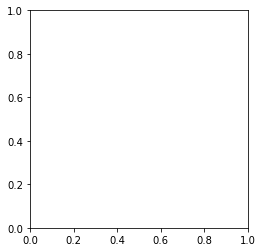

In [14]:
countries.plot()

Control the figure width and height of the plot. The units are (apparently) inches, see [matplotlib docs for more](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure), I think the display auto-adjusts this.

In [ ]:
countries.plot(figsize=(5,5))

Generate a `chloropeth` map using the `gdp_per_cap` column.

In [ ]:
countries.plot(figsize=(12,5), column='gdp_per_cap', legend=True)

<div class="alert alert-info" role="alert">
  <strong>ACTIVITY 2</strong>
   <br>
   The above plot looks like the continents of 'Antartica' and 'Seven seas (open ocean)' are skewing the plot a bit.
    <br>
    Try to remove these two continents from the data that you call the "plot" method on
    <br>Hint, earlier we combined used two filters, see "cell 7", you can use the same approach and use the '!=' operator.
   <br>
</div>

We can adjust the palette by using the `cmap` property, See cmap [documentation](https://matplotlib.org/tutorials/colors/colormaps.html)

In [ ]:
countries.plot(figsize=(12,5), column='gdp_per_cap', cmap='Set1', legend=True);

<div class="alert alert-info" role="alert">
  <strong>ACTIVITY 3</strong>
   <br>
    On the above plot, the 'Set1' cmap probably isn't the best for a field of graduated values like GDP.
    Check out the <a href=https://matplotlib.org/tutorials/colors/colormaps.html>cmap docs</a>, scroll down and select an alternative cmap and modify the above figure.
   <br>
</div>

# Part 3. Plotting with matplotlib for fine-grained control

For simple, single maps, the 'plot' method is fine.  
Howevever, you will find quickly that you may have to use the widely used `pyplot` interface of matplotlib.  
For newcomers and seasoned coders, matplotlib can be confusing, so here we will use several simple examples

Next we're going to create two datasets and overlay them on the same plot which is a fairly natural thing for a GIS person to do. To do this we will use `subplots` of `pyplot` which has been imported as `plt`.

<div class="alert alert-warning" role="alert">
  <strong>Some background about plotting with matplotlib</strong>
    <br>
    ALWAYS, ALWAYS, <strong>ALWAYS</strong> specify your plots first, then add plots to the 'canvas'.  
    <br>
    The subplot object returns a `figure` and an `axes` object.  
    <br>
    What's going on below is, we call a subplot method which retuns a 'figure' and an 'axes'.
    <br>
    A plot can have many subplots but this example uses one.
    <br>
    Then two plots, effectively two layers can plotted on to the plt canvass over the top of each other, giving the illusion that it's one plot.
    <br>
    Although flexible, plotting with matplotlib can be hard to get your head around, and you will quickly find there are multiple options for plotting, but this is a solid example to follow.
</div>

In [ ]:
# specifying arguments (1 x row,1 x column) 
fig, ax = plt.subplots(nrows=1, ncols=1) 

# plot the first 'layer' of all African countries
countries[(countries.continent == 'Africa')].plot(color='b', ax=ax)

# plot the 2nd layer of countries
countries[(countries.continent == 'Africa') & (countries.gdp_ph_day <= 5)].plot(ax=ax,color='r')

Using the fine-grained control of `matplotlib`, mutliple `subplots` can be plotted by returning multiple `axes` objects and specifying the dimensions of the grid of subplots

In [ ]:
# set the figure
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,10)) 

# plot just countries on ax1 which is the first subplot axes object
countries.plot(color='b', ax=ax1)

# plot BOTH countries and the filtered country layer on ax2, the second subplot axes object
countries.plot(ax=ax2,color='b')
countries[(countries.gdp_ph_day <= 5)].plot(ax=ax2,color='r')
plt.tight_layout()

In addition to maps, matplotlib has numerous other plotting options, but first we'll create a new geodataframe as a subset from the countries geodataframe

In [ ]:
south_am = countries[countries.continent == 'South America'].set_index('name')

As well as maps, let's plot some a different 'column' of data (e.g. using `pop_est` column) as a bar chart

In [ ]:
south_am.pop_est.sort_values(ascending=False).plot.bar(figsize=(6,3))

Finally, we can plot multiple subplots of different types and control the position of the plots

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 5))

# plot 1st axes object
countries[countries.continent == 'South America'].plot(ax=ax1, color='b')
countries[countries.name == 'Brazil'].plot(ax=ax1,color='r')

# plot 2nd axes object
south_am.gdp_md_est.sort_values(ascending=False).plot.bar(ax=ax2)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
ax2.title.set_text('GDP ($ Millions)')

# plot 3rd axes object
ax3_x_data = south_am.index
ax3 = south_am.pop_est.sort_values(ascending=False).plot.bar(ax=ax3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=90)
ax3.title.set_text('Population')

plt.tight_layout()

# Part 4. Plotting with Cartopy

Matplotlib has been extended by number of specialist python packages, here we'll look at [cartopy](https://scitools.org.uk/cartopy/docs/latest/). Cartopy ships with libraries `PROJ.4`, `NumPy` and `Shapely` libraries, all of which combine to provide geographic mapping capabilities, built on the matplotlib interface.

Here's several simple examples:

In [ ]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines();

In [ ]:
plt.figure()
ax = plt.axes(projection=ccrs.Miller())
ax.stock_img();

As well as `ax.coastlines()` and `ax.stock_img`, cartopy has a number of other useful in-built datasets that streamline the use the [Natural Earth](http://www.naturalearthdata.com/) data.

Here are the standard `cfeature` inbuilts,
```python
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
```

Also, the `GeoAxes` plot can project the map in a wide variety of projections
```python
.Orthographic()
.Miller()
.Miller()
.PlateCarree()
```

<div class="alert alert-info" role="alert">
  <strong>ACTIVITY 4</strong>
    <br>Create a cartopy map following the Example above but 
    <br>1. add one/some of the additional cfeatures to the plot, 
    <br>2. change the projection (listed above) from .Miller() to another.
</div>

Here's an example of combining different attributes of matplotlib, highlighting countries that meet the query criteria

In [ ]:
plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.Orthographic(30,10))
ax.stock_img()
countries[(countries.gdp_ph_day <= 5)].plot(ax=ax,color = 'red', edgecolor='black',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE);

# Part 5. Read data from an API and do something with it

Python has a useful HTTP interface called `requests` for downloading (GET) and posting (POST), which is particularly useful to hooking on to data APIs.

The `requests` package and be used together with `json` or `geojson` packages to quickly load data to a `geopandas GeoDataFrame`.

Here we submit a get HTTP query the USGS earthquake event API endpoint and retrive 10 days of earthquake events.
Then create a geojson object (in memory), which geopandas can work with.

In [ ]:
my_url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2014-01-01&endtime=2014-01-10'
r = requests.get(my_url)
json_quakes = geojson.loads(r.content)

Look at the GeoJSON response 

In [ ]:
json_quakes

Use the `from_features` method, to create a new `GeoDataFrame` and let's plot it

In [ ]:
gdf_quakes = GeoDataFrame.from_features(json_quakes)
gdf_quakes.plot();

Plotting the raw points doesn't give much away.  
Let's overlay with `cartopy`

In [ ]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
gdf_quakes.plot(ax=ax, color='r');
ax.add_feature(cfeature.COASTLINE);

Now we have our dataframe, let's look at the columns available using the `columns` attribute

In [ ]:
gdf_quakes.columns

<div class="alert alert-info">
    <strong>ACTIVITY 5</strong>
    <br>Take some time to explore this data
    <br>Try to filter on the earthquak magnitude ('mag') column
    <br>Filter the earthsquakes and display only the Magnitudes greater than say 5, or whatever number you like
</div>

## Part 6. Read data and spatially joining dataframes

As well as plotting and dataframe manipulation, Geopandas can perform `spatial joins` between two spatial datasets.

First we'll read in a crime incidents CSV as a `pandas` dataframe that contains latitude and longitude coordinate pairs.

<div class="alert alert-warning">
    <strong>NOTE ON CSV DATA</strong>
    <br>CSV data that contains x,y coordinate pairs is not a recognised 'geospatial' data format by pandas  
    <br>Filter the earthsquakes and display only the Magnitudes greater than say 5, or whatever number you like
</div>

In [ ]:
# this uses a jupyter magic to get the current path of this notebook
pth = !pwd
pth = pth[0]
crime_data_all = pd.read_csv(os.path.join(pth,'data','london-crime-data','2019-07-crime-data.csv'))
crime_data_all.tail(5)

This `crime_data_all` dataset has ~98K rows but a simple [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) can count the occurances of unique values in `Crime Type`

In [ ]:
crime_data_all.groupby(['Crime type']).size()

Create a new dataframe filtering on a specific crime type

In [ ]:
crime_burglaries = crime_data_all[crime_data_all['Crime type'] == 'Burglary']
crime_burglaries.head(5)

Now we need to create a `geopandas` GeoDataFrame from the existing `pandas` dataframe, to do this, we need to set the all important `geometry` field 

In [ ]:
geometry = [Point(xy) for xy in zip(crime_burglaries.Longitude, crime_burglaries.Latitude)]
crs = {'init': 'epsg:4326'}
gdf_crime_burglaries = gpd.GeoDataFrame(crime_burglaries, crs=crs, geometry=geometry)

Now the CSV crime data is a `GeoDataFrame` and plot!

In [ ]:
gdf_crime_burglaries.plot()

<div class="alert alert-warning" role="alert">
  Watch out for that outlier in the data, we can come back and clean this!
</div>

Next, we can read in an Esri Shape File of London administrative boroughs

In [ ]:
london_boroughs = gpd.read_file(os.path.join(pth,'data','london-boroughs','london_boroughs.shp'))
london_boroughs.set_index('name')
london_boroughs.plot(facecolor="none", edgecolor='black')

Now we have loaded both datasets:
1. Burglary incidents (points)
2. London Administrative Borough (polygons)

We can use the geopandas function `sjoin` to join the two datasets spatially using an intersect, and then count the number of incidents per borough `name`

In [ ]:
ds = gpd.sjoin(gdf_crime_burglaries, london_boroughs, how="inner", op='intersects').groupby(['name']).size()
burglary_count_per_borough = ds.rename('burglary_count')
burglary_count_per_borough

The result is a pandas `dataseries`, a single column of data with an index. A dataseries can be plotted, e.g. via a bar

In [ ]:
burglary_count_per_borough.plot.bar()

Finally we need to use an attribute join of the new count of crime in `borough_join_crime` with the geometry of the London boroughs

In [ ]:
borough_join_crime = london_boroughs.merge(burglary_count_per_borough, on='name').set_index('name')

... and plot as a chloropeth 

In [ ]:
borough_join_crime.plot(column='burglary_count', legend=True).set_aspect('auto')

Finally, finally we can create a matplotlib with subplots to plot data

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
ax1 = borough_join_crime.burglary_count.plot.bar(ax=ax1)
ax2 = borough_join_crime.plot(column='burglary_count',ax=ax2, legend=True)

ax2.set_aspect('auto')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

fig.suptitle('Burglaries per London Borough during July 2019')
plt.tight_layout;

<div class="alert alert-info" role="alert">
  <strong>ACTIVITY</strong>
  <br>GO FORTH AND HACK WITH GEOPANDAS !
</div>